In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cuisine-rating/Cuisine_rating.csv


* The data is related to restaurants cuisine and there ratings by customers.

# Loading Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data
The data contains 15 independent variables

* User ID : customers User id
* Area code : area code
* Location: location
* Gender : customers gender
* YOB : customers birthyear
* Marital Status : customer is married or single or divorced
* Budget : budget they may spend in restaurant
* Cuisine : types of cuisines that customers are more likely to have
* Activity: Customers career status whether student or professional
* Food Rating : rating for food on the scale of 5
* Service Rating : rating for food on the scale of 5
* Overall rating : rating based on food and service rating
* Often A S (alocohol drinker,smoker) : wheather the customer is often A S or not

# Reading Data

In [3]:
df=pd.read_csv('/kaggle/input/cuisine-rating/Cuisine_rating.csv')
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


# Dimension of Data

In [4]:
df.shape

(200, 15)

the data contains 15 columns and 200 rows.

In [5]:
org_data=df.copy()

# Features of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


as we can see there are 7 numeric and 8 categorical variables.

In [7]:
df.loc[df['Location'].apply(lambda x: x.split(',')[-1])=='ny','Location']=df.loc[df['Location'].apply(lambda x: x.split(',')[-1])=='ny','Location'].str.replace('ny','NY')

In [8]:
df['Overall Rating'].describe()

count    200.000000
mean       3.225000
std        1.079445
min        1.000000
25%        2.500000
50%        3.000000
75%        4.000000
max        5.000000
Name: Overall Rating, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Overall Rating', ylabel='Density'>

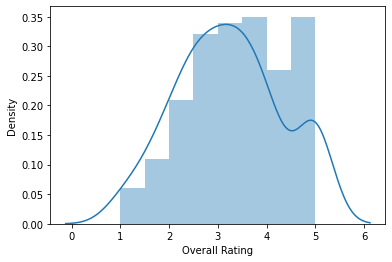

In [9]:
sns.distplot(df['Overall Rating'])

<AxesSubplot:ylabel='Frequency'>

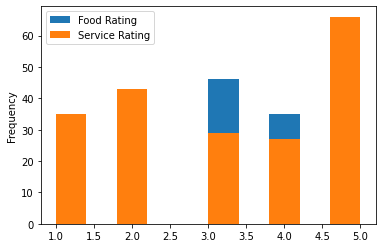

In [10]:
df[['Food Rating','Service Rating']].plot(kind ='hist')

In [11]:
df.groupby(['Cuisines'])['Overall Rating'].value_counts()

Cuisines  Overall Rating
Chinese   2.5                4
          3.0                4
          3.5                4
          4.0                4
          5.0                3
          1.5                2
          2.0                2
          4.5                1
Filipino  3.0                7
          3.5                7
          4.0                6
          2.0                5
          2.5                4
          1.5                2
          5.0                2
          1.0                1
French    2.5               11
          5.0                6
          3.0                5
          1.5                4
          4.0                4
          2.0                2
          3.5                2
Indian    3.5                8
          3.0                7
          2.5                6
          4.0                5
          1.0                3
          5.0                2
          4.5                1
Italian   2.5                4
          5.0 

* the data is slightly biased 




In [12]:
df.loc[df['Location'].apply(lambda x: x.split(',')[-1])=='ny','Location'].str.replace('ny','NY')

Series([], Name: Location, dtype: object)

In [13]:
cat_data=df.select_dtypes(include=[np.object])
cat_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Location,Gender,Marital Status,Activity,Cuisines,Alcohol,Smoker,Often A S
0,"Upper East Side,NY",Female,Single,Professional,Japanese,Never,Never,No
1,"St. George,NY",Female,Married,Student,Indian,Never,Socially,No
2,"Upper West Side,NY",Male,Single,Student,Seafood,Often,Often,Yes
3,"Upper East Side,NY",Female,Married,Professional,Japanese,Never,Socially,No
4,"Central Park,NY",Male,Single,Student,Filipino,Socially,Never,No


In [14]:
num_data=df.select_dtypes(include=[np.number])
num_data.head()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
0,1,153,2006,3,5,4,4.5
1,2,123,1991,3,1,1,1.0
2,3,122,1977,5,5,5,5.0
3,4,153,1956,5,3,1,2.0
4,5,129,1997,4,2,4,3.0


In [15]:
df['Service Rating'].value_counts()

5    66
2    43
1    35
3    29
4    27
Name: Service Rating, dtype: int64

In [16]:
df['Food Rating'].value_counts()

5    53
3    46
2    35
4    35
1    31
Name: Food Rating, dtype: int64

# Independent Variables(numeric variables)

<AxesSubplot:>

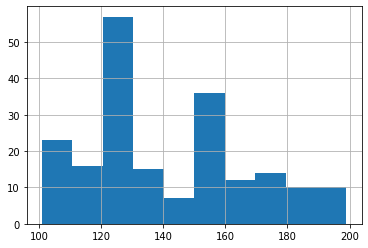

In [17]:
df['Area code'].hist()

In [18]:
area1=df[(df['Area code']>=120) & (df['Area code']<=130)]
area1.groupby(['Location','Cuisines'])['Food Rating'].value_counts()

Location            Cuisines  Food Rating
Central Park,NY     Chinese   4              1
                              5              1
                    Filipino  2              2
                              3              2
                    French    5              2
                              4              1
                    Indian    2              2
                              1              1
                              3              1
                    Italian   5              1
                    Japanese  4              2
                              5              1
                    Seafood   2              1
                              3              1
Riverdale,NY        Italian   5              1
St. George,NY       Chinese   3              1
                              5              1
                    Filipino  3              4
                              1              2
                              4              1
                  

<AxesSubplot:>

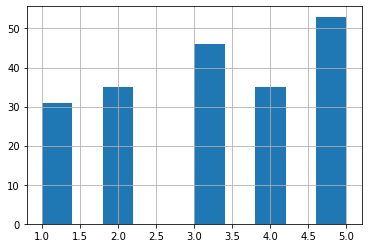

In [19]:
df['Food Rating'].hist()

In [20]:
f1=df[df['Food Rating']>=4.5]
f1.groupby('Food Rating')['Cuisines'].value_counts()

Food Rating  Cuisines
5            Japanese    13
             French       8
             Chinese      7
             Indian       7
             Italian      7
             Seafood      6
             Filipino     5
Name: Cuisines, dtype: int64

<AxesSubplot:>

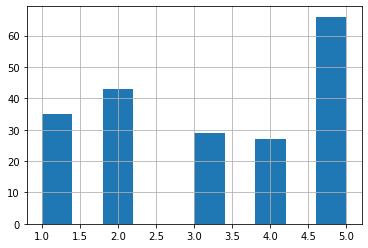

In [21]:
df['Service Rating'].hist()

<AxesSubplot:>

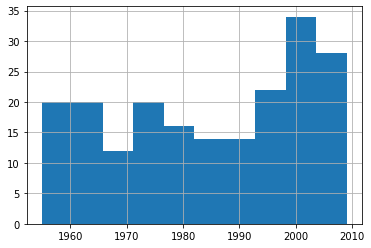

In [22]:
df['YOB'].hist()

<AxesSubplot:>

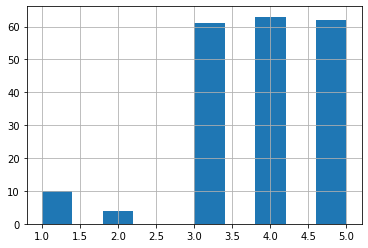

In [23]:
df['Budget'].hist()

# Independent Variables (categorical variables)

<AxesSubplot:xlabel='Cuisines', ylabel='count'>

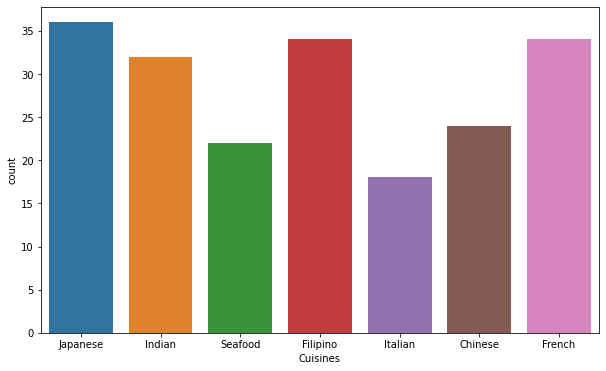

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Cuisines'])


In [25]:
c=df[((df['Cuisines']=='Japanese') | (df['Cuisines']=='Filipino')| (df['Cuisines']=='French'))]
c.groupby(['Location','Cuisines'])['Food Rating'].value_counts()

Location            Cuisines  Food Rating
Central Park,NY     Filipino  2              4
                              3              4
                    French    5              4
                              4              2
                    Japanese  4              3
                              5              1
China Town, NY      Filipino  1              2
                    French    3              4
Market City, NY     Filipino  5              2
                    French    2              2
                              4              2
                    Japanese  4              3
                              5              3
Riverdale,NY        Filipino  1              3
                              5              2
                              2              1
                    French    2              2
                    Japanese  2              3
                              4              2
                              5              2
                  

<AxesSubplot:xlabel='Location', ylabel='count'>

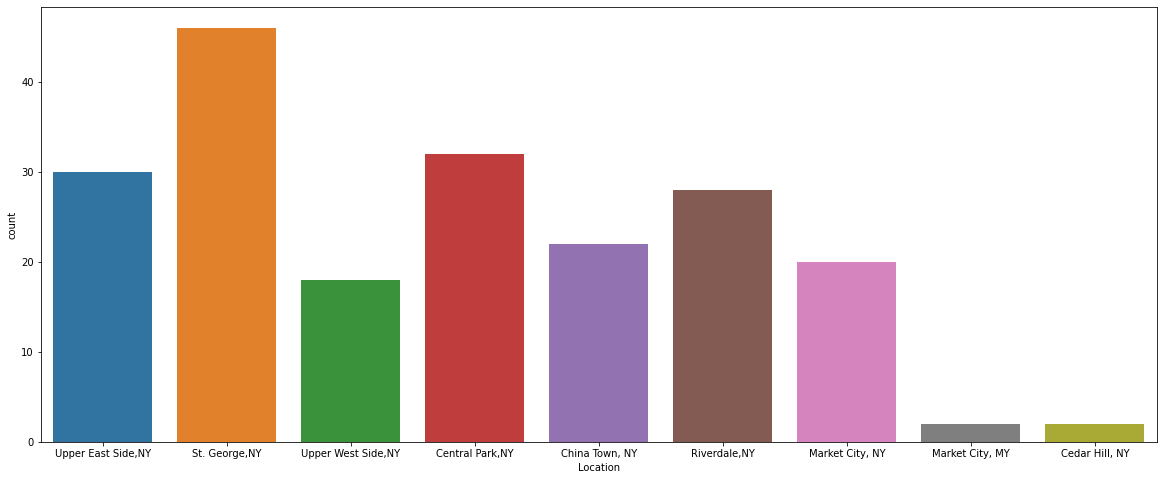

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Location'])

<AxesSubplot:xlabel='Location,Overall Rating'>

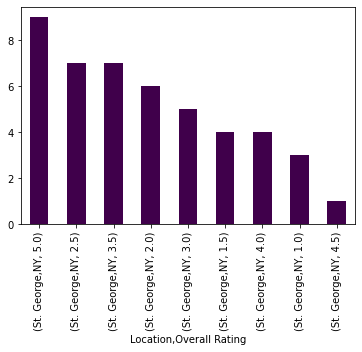

In [27]:
l1=df[df['Location']=='St. George,NY']
l1.groupby('Location')['Overall Rating'].value_counts().plot(kind='bar',cmap='PRGn')

<AxesSubplot:xlabel='Gender', ylabel='count'>

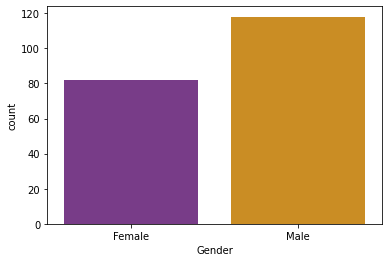

In [28]:
sns.countplot(x=df['Gender'],palette='CMRmap')

<AxesSubplot:xlabel='Gender,Marital Status'>

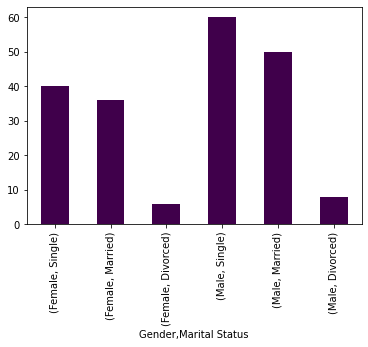

In [29]:
df.groupby('Gender')['Marital Status'].value_counts().plot(kind='bar',cmap='PRGn')

<AxesSubplot:xlabel='Gender,Activity'>

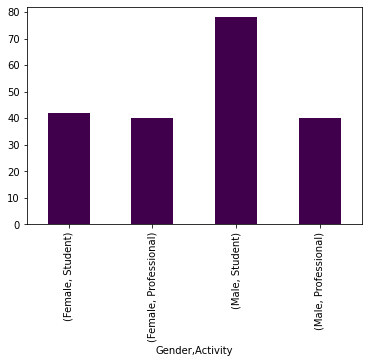

In [30]:
df.groupby('Gender')['Activity'].value_counts().plot(kind='bar',cmap='PRGn')

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

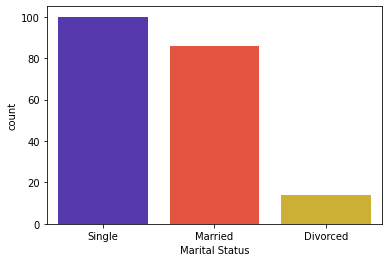

In [31]:
sns.countplot(x=df['Marital Status'],palette='CMRmap')

<AxesSubplot:xlabel='Activity', ylabel='count'>

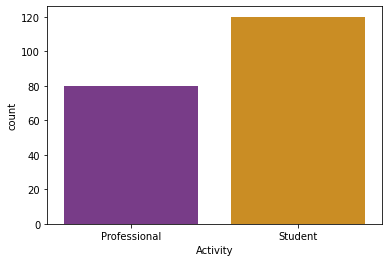

In [32]:
sns.countplot(x=df['Activity'],palette='CMRmap')

<AxesSubplot:xlabel='Smoker', ylabel='count'>

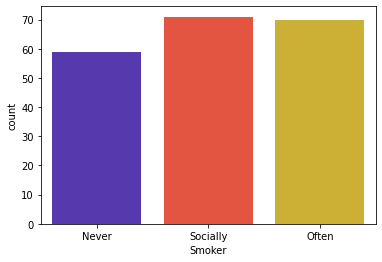

In [33]:
sns.countplot(x=df['Smoker'],palette='CMRmap')


<AxesSubplot:xlabel='Often A S', ylabel='count'>

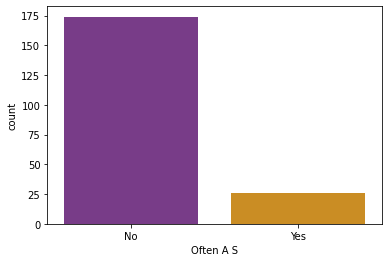

In [34]:
sns.countplot(x=df['Often A S'],palette='CMRmap')

* obervations
1. most of the customers are students or unmarried male
2. we can see most of the restaurants are from the location St. George,NY.

# Target Variable vs Independent Numerical Variables¶


<AxesSubplot:xlabel='Food Rating', ylabel='Overall Rating'>

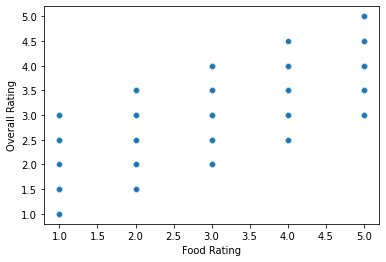

In [35]:
sns.scatterplot(x=df['Food Rating'],y=df['Overall Rating'])

<AxesSubplot:xlabel='Service Rating', ylabel='Overall Rating'>

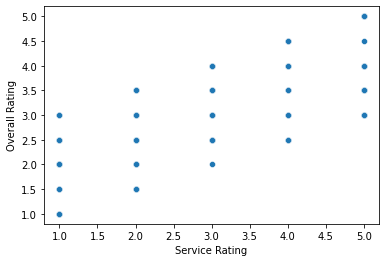

In [36]:
sns.scatterplot(x=df['Service Rating'],y=df['Overall Rating'])

* observations
1.  Overall rating is increasing with increrase in service and food rating.

# Target Variable vs Independent Categorical Variables

<AxesSubplot:xlabel='Location', ylabel='Overall Rating'>

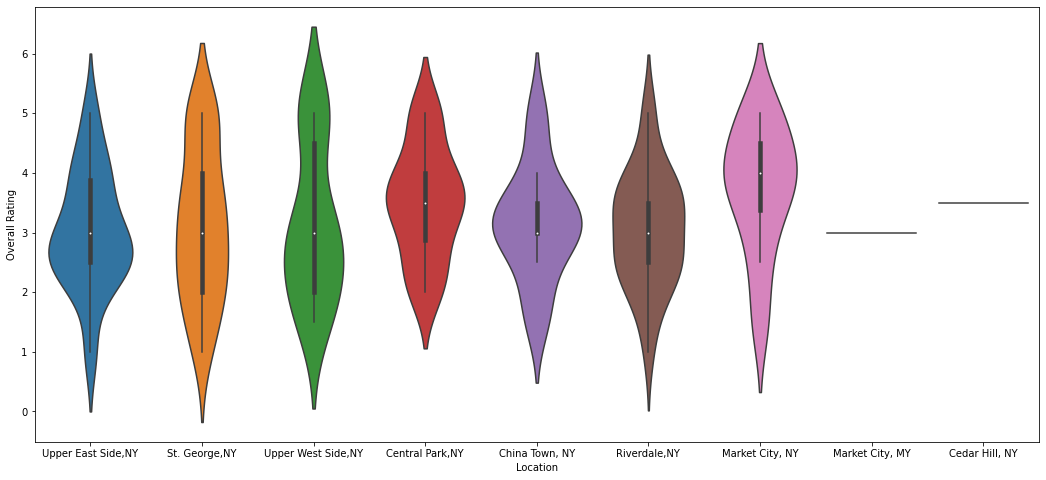

In [37]:
plt.figure(figsize=(18,8))
sns.violinplot(x=df['Location'],y=df['Overall Rating'])

<AxesSubplot:xlabel='Cuisines', ylabel='Overall Rating'>

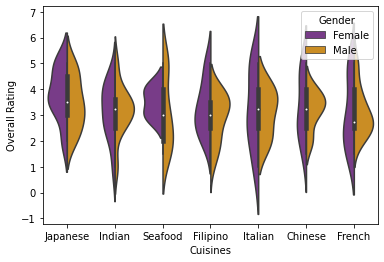

In [38]:
sns.violinplot(x=df['Cuisines'],y=df['Overall Rating'],hue=df['Gender'],split=True,palette='CMRmap')

<AxesSubplot:xlabel='Activity', ylabel='Overall Rating'>

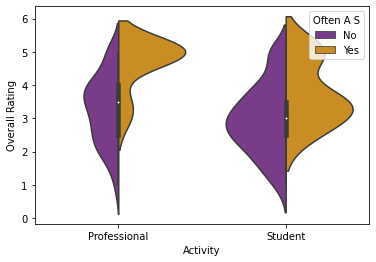

In [39]:
sns.violinplot(x=df['Activity'],y=df['Overall Rating'],hue=df['Often A S'],split=True,palette='CMRmap')

# Missing Data

In [40]:
df.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

There is 0 null values in this dataset

<AxesSubplot:xlabel='Cuisines', ylabel='count'>

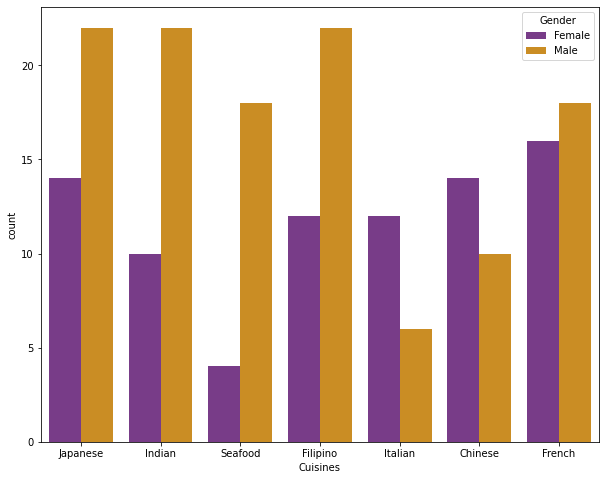

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Cuisines'],hue=df['Gender'],palette='CMRmap')

as we can see Japanese, Indian and filipino cuisines are mostly preffered by male and French cuisine is preffered female

In [42]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [43]:
df['Budget'].value_counts()

4    63
5    62
3    61
1    10
2     4
Name: Budget, dtype: int64

In [44]:
def tg():
    target=[]
    for i in df['Budget']:
        if i>3:
            target.append('high')
        if i==3:
            target.append('medium')
        if i<3:
            target.append('low')
    return target

a=tg()
a
df['Target']=a

In [45]:
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Target
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,medium
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,medium
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,high
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,high
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No,high
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,high
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,high
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,medium


In [46]:
df=df.drop('Area code',axis=1)

In [47]:
df=df.set_index('User ID')

In [48]:
df

,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Target
User ID,,,,,,,,,,,,,,
1,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,medium
2,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,medium
3,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,high
4,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,high
5,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No,high
197,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,high
198,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,high


In [49]:
X=df.drop('Target',axis=1)
Y=df['Target']

In [50]:
X

,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
User ID,,,,,,,,,,,,,
1,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
2,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
3,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
4,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
5,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
197,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
198,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No


In [51]:
Y

User ID
1      medium
2      medium
3        high
4        high
5        high
        ...  
196      high
197      high
198      high
199    medium
200      high
Name: Target, Length: 200, dtype: object

In [52]:
from sklearn.preprocessing import LabelEncoder
X_enc = X.copy()
for col in X.columns:
    lb = LabelEncoder() # Shift + Tab
    X_enc[col] = lb.fit_transform(X[col].values)
    
X_enc.head()

,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
User ID,,,,,,,,,,,,,
1,7,0,43,2,0,2,5,0,0,4,3,7,0
2,6,0,30,1,1,2,3,0,2,0,0,0,0
3,8,1,17,2,1,4,6,1,1,4,4,8,1
4,7,0,1,1,0,4,5,0,2,2,0,2,0
5,1,1,34,2,1,3,1,2,0,1,3,4,0


In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(X_enc,Y)
model.score(X_enc, Y)

0.995

In [54]:
scores = []
for k in range(1,40):
    knn = KNeighborsClassifier(k).fit(X_enc, Y)
    scores.append(knn.score(X_enc, Y))

print(scores, end = " ")

[1.0, 0.995, 0.985, 0.855, 0.86, 0.835, 0.865, 0.835, 0.81, 0.79, 0.8, 0.75, 0.735, 0.72, 0.71, 0.7, 0.695, 0.695, 0.675, 0.68, 0.69, 0.665, 0.685, 0.67, 0.705, 0.66, 0.67, 0.635, 0.63, 0.61, 0.63, 0.64, 0.63, 0.615, 0.63, 0.645, 0.64, 0.615, 0.635] 

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc,Y) 
kn= KNeighborsClassifier(n_neighbors=5, metric='manhattan')
kn.fit(X_enc,Y)
kn.score(X_test, y_test),kn.score(X_train,y_train)

(0.92, 0.8933333333333333)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_enc,Y) 
svc = SVC() 
svc.fit(X_train, y_train)

svc.score(X_test, y_test),svc.score(X_train,y_train)

(0.5, 0.6666666666666666)

In [57]:
X_ohe = pd.get_dummies(X)      #using One hot encoder
X_train, X_test, y_train, y_test = train_test_split(X_ohe, Y)
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test), svc.score(X_train, y_train)


(0.6, 0.6333333333333333)

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
nb = GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_train, y_train),nb.score(X_test, y_test)

(0.6066666666666667, 0.74)

In [59]:
from  sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
nb = BernoulliNB()
nb.fit(X_train,y_train)
nb.score(X_train, y_train),nb.score(X_test, y_test)

(0.7533333333333333, 0.66)

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)
dt.score(X_test, y_test),dt.score(X_train,y_train)

(1.0, 1.0)

In [61]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
clf = DecisionTreeClassifier()
param_dist = {"max_depth": [3],
              "max_features": range(1, 10),
              "min_samples_split": range(2,10),
              "criterion": [ "entropy"]}
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_enc,Y)
random_search.best_estimator_,random_search.best_params_,random_search.best_score_

(DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=9,
                        min_samples_split=3),
 {'min_samples_split': 3,
  'max_features': 9,
  'max_depth': 3,
  'criterion': 'entropy'},
 1.0)

In [62]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_enc,Y)
grid_search.best_score_

1.0